In [ ]:
# Importar librerías
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Definir la URL del archivo .csv que quieres cargar
url = "https://raw.githubusercontent.com/Jhon-Moreno/ProyectoMLII/main/OnlineNewsPopularity.csv"

# Leer el archivo .csv desde la URL y guardar el resultado en un DataFrame
df = pd.read_csv(url)

# Establecer las opciones de configuración para mostrar la tabla
pd.set_option('display.notebook_repr_html', True) # Habilitar la representación HTML

# Mostrar el DataFrame en forma de tabla
display(df.head())


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
# Mostrar el número de filas y columnas del DataFrame
print(df.shape)

# Mostrar el resumen estadístico de las columnas numéricas
print(df.describe())


(39644, 61)
          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.

In [ ]:
# Mostrar el número de valores faltantes de cada columna
print(df.isnull().sum())

# Mostrar el tipo de dato de cada columna
print(df.dtypes)


url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object


<ipython-input-23-fd98a4e6076f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap="coolwarm")


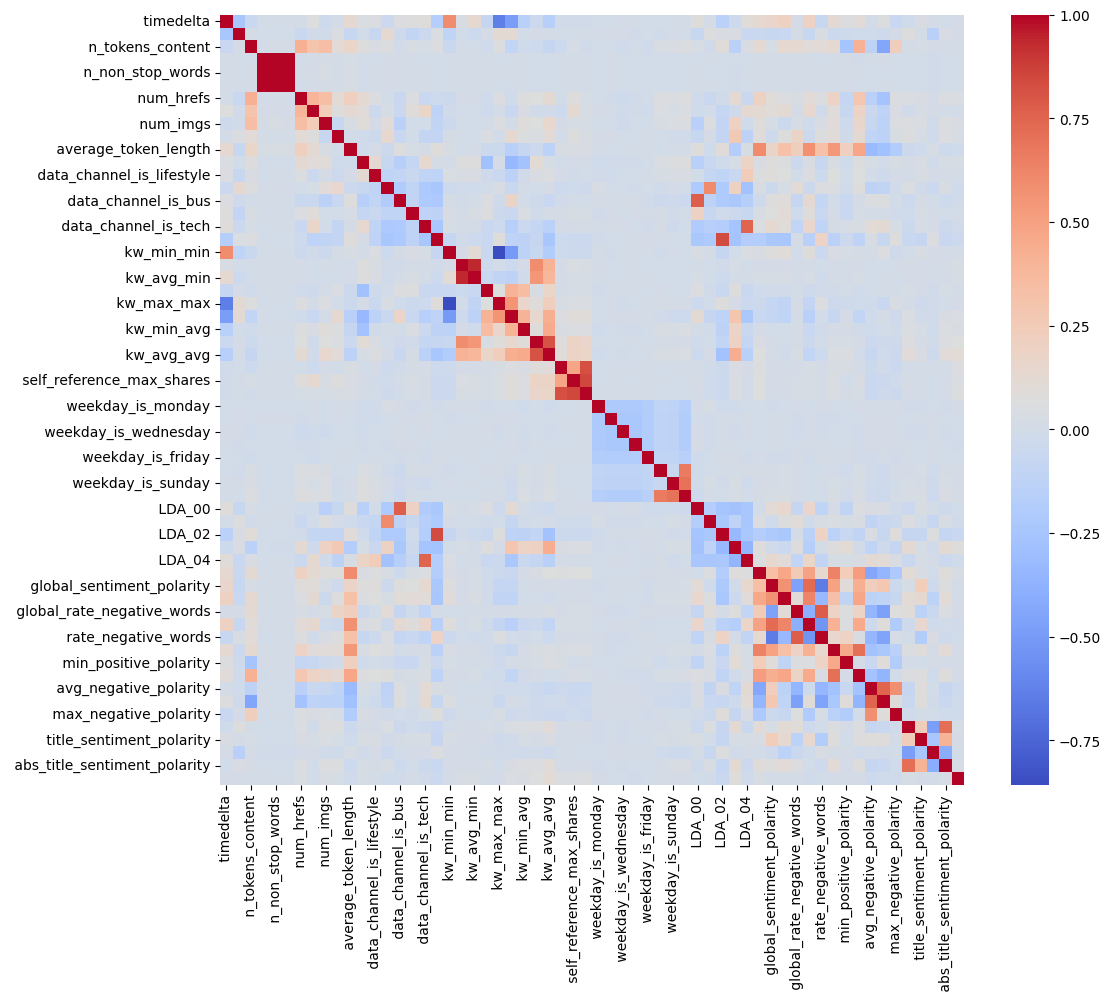

In [ ]:
# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.show()

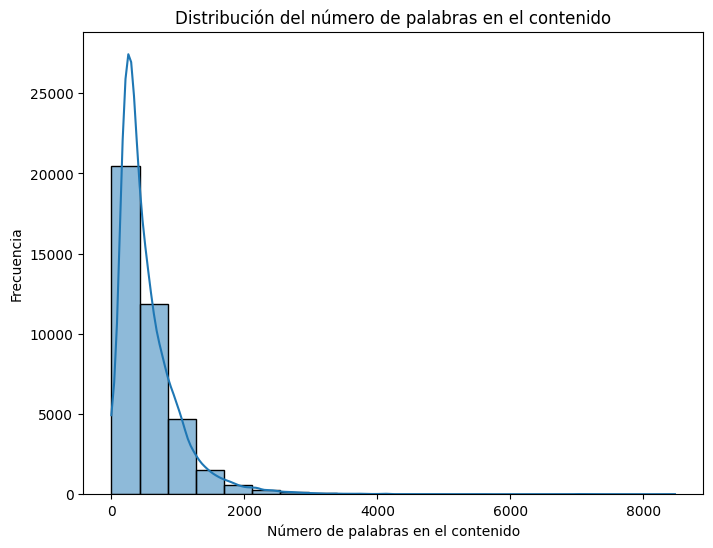

In [ ]:
# Crear un histograma para visualizar la distribución de una columna numérica
plt.figure(figsize=(8, 6))
sns.histplot(df[" n_tokens_content"], bins=20, kde=True)
plt.xlabel("Número de palabras en el contenido")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de palabras en el contenido")
plt.show()

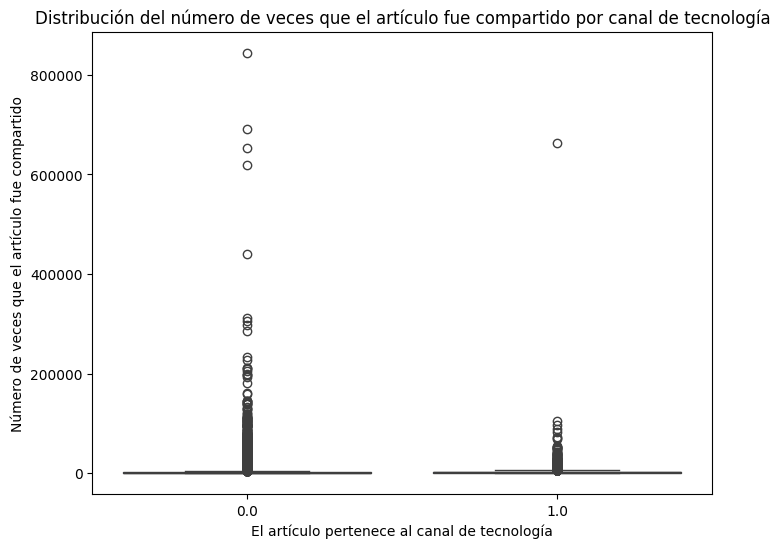

In [ ]:
# Crear un diagrama de caja para visualizar la distribución de una columna numérica por categorías
plt.figure(figsize=(8, 6))
sns.boxplot(x=" data_channel_is_tech", y=" shares", data=df)
plt.xlabel("El artículo pertenece al canal de tecnología")
plt.ylabel("Número de veces que el artículo fue compartido")
plt.title("Distribución del número de veces que el artículo fue compartido por canal de tecnología")
plt.show()

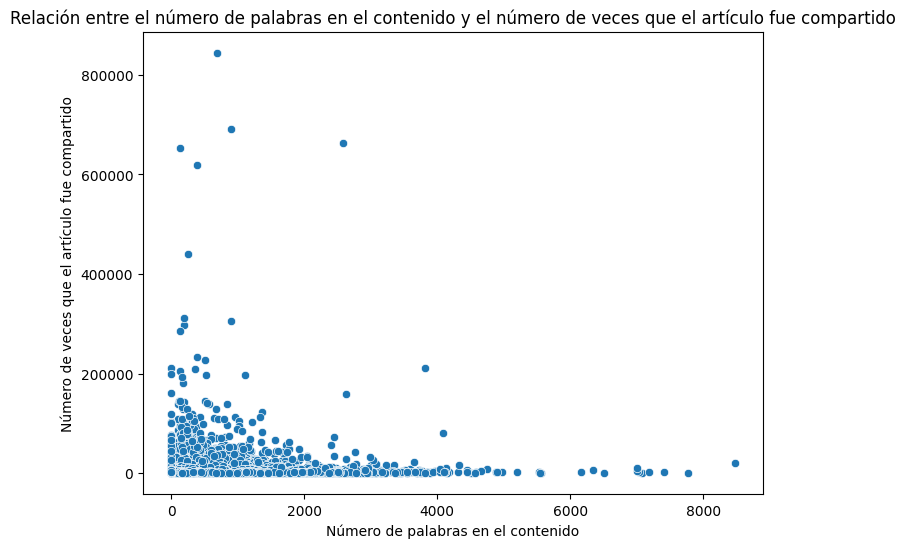

In [ ]:
# Crear un diagrama de dispersión para visualizar la relación entre dos columnas numéricas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=" n_tokens_content", y=" shares", data=df)
plt.xlabel("Número de palabras en el contenido")
plt.ylabel("Número de veces que el artículo fue compartido")
plt.title("Relación entre el número de palabras en el contenido y el número de veces que el artículo fue compartido")
plt.show()


## analisis de la exploracion

· Los datos no tienen valores nulos, lo que indica que se ha hecho un tratamiento de los valores que faltan.

· Los datos tienen variables categóricas codificadas como variables binarias, lo que facilita su uso por los algoritmos de ML.

· Los datos tienen algunas características normalizadas, como n_unique_tokens, n_non_stop_words y n_non_stop_unique_tokens, que tienen valores entre 0 y 12.

· Los datos tienen otras características que no están normalizadas, como n_tokens_title, n_tokens_content, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length y num_keywords, que tienen valores muy diferentes entre sí.

· Los datos tienen muchas características que pueden ser irrelevantes o redundantes para el objetivo del modelo, como la url, el timedelta y el kw_min_min.


In [ ]:
# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las características numéricas que se quieren normalizar
num_features = [" n_tokens_title", " n_tokens_content", " num_hrefs", " num_self_hrefs", " num_imgs", " num_videos", " average_token_length", " num_keywords"]

# Ajustar el escalador a las características numéricas
scaler.fit(df[num_features])

# Transformar las características numéricas con el escalador
df[num_features] = scaler.transform(df[num_features])

# Mostrar las primeras filas del DataFrame normalizado
print(df.head())

In [ ]:
# Crear una lista con las variables que quieres eliminar
vars_to_drop = ["url", " timedelta", " kw_min_min", " data_channel_is_lifestyle", " data_channel_is_entertainment", " data_channel_is_bus", " data_channel_is_socmed", " data_channel_is_tech", " data_channel_is_world"]

# Eliminar las variables del DataFrame usando el método drop()
df = df.drop(columns=vars_to_drop)

In [ ]:
display(df)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


#selecion de variables de interes a traves de dos criterios (AIC - BIC)

In [ ]:
# Definir la variable dependiente y las variables independientes
y = df[" shares"]
X = df.drop(columns=[" shares"])

# Añadir una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar un modelo de regresión lineal por máxima verosimilitud
model = sm.OLS(y, X).fit(method="pinv")

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     18.51
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          2.80e-156
Time:                        05:23:52   Log-Likelihood:            -4.2691e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39594   BIC:                         8.544e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
# Calcular el valor de AIC
aic = model.aic
print("AIC:", aic)

# Calcular el valor de BIC
bic = model.bic
print("BIC:", bic)

AIC: 853927.5380609827
BIC: 854356.922805559
